In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statistics import mean
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
def randompoints(start,end,npoint):
    c =3* np.random.normal(start, end, (2, 2))
    x_r = np.random.normal(start,end,(npoint,2))
    return c,x_r

In [ ]:
def labelGeneration(npoint):
    y = [-1 for i in range(npoint)]
    y.extend ([1 for i in range(npoint)])
    y_arr = np.array([y])
    y_labels= y_arr.T
    return y_labels

In [ ]:
def normalizePoints(x_r,c):
    for i in range(len(x_r)):
        for j in range(len(x_r[0])):
            if i<(len(x_r)//2) and j==0:
                x_r[i][j]=x_r[i][j]+c[0][0]
            elif i<(len(x_r)//2) and j==1:
                x_r[i][j]=x_r[i][j]+c[0][1]
            elif i>(len(x_r)//2) and j==0:
                x_r[i][j]=x_r[i][j]+c[1][0]
            elif i>(len(x_r)//2) and j==1:
                x_r[i][j]=x_r[i][j]+c[1][1]
        
    return x_r

In [ ]:
def augmentVector(x_r,npoint):
    x_new = [1 for i in range(npoint)]
    x_n = np.array(x_new)
    x_r = np.insert(x_r, 0, x_n, axis=1)
    return x_r

In [ ]:
def plotPoints(x,y):
    X=x[:,0]
    Y=x[:,1]
    theta = np.polyfit(X, Y, 1)
    y_line = theta[1] + theta[0] * X
    for i in range(len(X)):
        if (Y[i]-theta[1] - theta[0] * X[i])>0:
            if(y[i]<0):
                y[i]=1
            plt.scatter(X[i], Y[i],c='g')
        else:
            if(y[i]>0):
                y[i]=-1
            plt.scatter(X[i], Y[i],c='b')
        
    #plt.plot(X, y_line, 'r')
    plt.show()
    return y

In [ ]:
def sign(lst,w):
    x_n = np.array(lst)
    w_=np.array(w)
    w_T=np.transpose(w)
    wx=np.multiply(w_T, x_n)
    h = np.sum(wx)
    if h<=0:
        return -1
    else:
        return 1

In [ ]:
def updateWeight(w,x,y):
    for i in range(len(w)):
        w[i]=w[i]+y*x[i]
    return w

In [ ]:
def entireSampleError(w,X_train,y_train):
    miss=0
    for i in range(len(X_train)):
        h=sign(X_train[i],w)
        if h!=y_train[i]:
            miss+=1
    return miss                    

In [ ]:
def pocketAlgo(X_train,y_train,e):
    it=0
    w=[]
    w_pocket=[]
    for i in range(0,3):
        w.append(0)
    #print(w)
    while(it<=5000):
        it+=1
        flag=0
        for i in range(len(X_train)):
            h=sign(X_train[i],w)
            if h!=y_train[i]:
                w=updateWeight(w,X_train[i],y_train[i])
                flag=1
                cur=entireSampleError(w,X_train,y_train)
                #print(w_pocket)
                if cur<e:
                    w_pocket=w[:]
                    e=cur
            #if flag==1:
                     #break
    
    return w_pocket,e

In [ ]:
def CalculateEout(w,X_test,y_test):
    miss=0
    for i in range(len(X_test)):
        h=sign(X_train[i],w)
        if h!=y_test[i]:
            miss+=1
    return miss

In [ ]:
def graphGeneration(in_sample_error,out_sample_error):
    em=mean(in_sample_error)
    om=mean(out_sample_error)
    df = pd.DataFrame({
       'Ein': in_error,
       'Eout': eouterr,
       'out-sample-mean': [om for i in range(len(eouterr))],
       'in-sample-mean': [em for i in range(len(in_error))]})

    df.plot()
    plt.xlabel("Sample Number")
    plt.ylabel("Error")
    plt.title("Error Trend in 50 data points")
    plt.show()

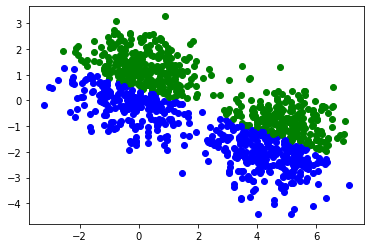

[0]
[99]


In [ ]:
in_sample_error=[]
out_sample_error=[]
for i in range(1):
    c0,x_r0=randompoints(0,1,1000)
    y0=labelGeneration(500)
    x_r0= normalizePoints(x_r0,c0)
    y_true0=plotPoints(x_r0,y0)
    x0=augmentVector(x_r0,1000)
    X_train, X_test, y_train, y_test = train_test_split(x0, y_true0, test_size=0.2,random_state=42)
    e0=len(X_train)
    w_p0,error0 = pocketAlgo(X_train,y_train,e0)
    in_sample_error.append(error0)
    print(in_sample_error)
    
    eer = CalculateEout(w_p0,X_test,y_test)
    out_sample_error.append(eer)
    print(out_sample_error)
    

In [ ]:
c,x_r=randompoints(0,1,100)
y=labelGeneration(50)
#print(x_r)
x_r= normalizePoints(x_r,c)

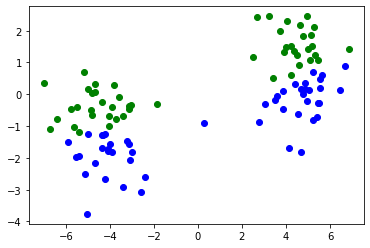

In [ ]:
y_true=plotPoints(x_r,y)
#print(y_true)
#print(x_r)
#x=augmentVector(x_r,100)
#print(x)

In [ ]:
in_error=[]
eouterr=[]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=0)
e1=len(X_train)
#print(y_train)
#in_error=[]
w_p,error = pocketAlgo(X_train,y_train,e1)
print(w_p)
in_error.append(error)
print(in_error)

NameError: ignored

In [ ]:
#eouterr=[]
eer = CalculateEout(w_p,X_test,y_test)
eouterr.append(eer)
print(eouterr)

In [ ]:
c2,x_r2=randompoints(0,1,100)
y2=labelGeneration(50)
x_r2= normalizePoints(x_r2,c2)
y_true2=plotPoints(x_r2,y2)
x2=augmentVector(x_r2,100)
X_train, X_test, y_train, y_test = train_test_split(x2, y_true2, test_size=0.2)
e2=len(X_train)
w_p2,error2 = pocketAlgo(X_train,y_train,e2)
in_error.append(error2)
print(in_error)

In [ ]:
eer2 = CalculateEout(w_p2,X_test,y_test)
eouterr.append(eer2)
print(eouterr)

In [ ]:
c3,x_r3=randompoints(0,1,100)
y3=labelGeneration(50)
x_r3= normalizePoints(x_r3,c3)
y_true3=plotPoints(x_r3,y3)
x3=augmentVector(x_r3,100)
X_train, X_test, y_train, y_test = train_test_split(x3, y_true3, test_size=0.2)
e3=len(X_train)
w_p3,error3 = pocketAlgo(X_train,y_train,e3)
in_error.append(error3)
print(in_error)

In [ ]:
eer3 = CalculateEout(w_p3,X_test,y_test)
eouterr.append(eer3)
print(eouterr)

In [ ]:
c4,x_r4=randompoints(0,1,100)
y4=labelGeneration(50)
x_r4= normalizePoints(x_r3,c3)
y_true4=plotPoints(x_r4,y4)
x4=augmentVector(x_r4,100)
X_train, X_test, y_train, y_test = train_test_split(x4, y_true4, test_size=0.2,random_state=42)
e4=len(X_train)
w_p4,error4 = pocketAlgo(X_train,y_train,e4)
in_error.append(error4)
print(in_error)

In [ ]:
eer4 = CalculateEout(w_p4,X_test,y_test)
eouterr.append(eer4)
print(eouterr)

In [ ]:
c4,x_r4=randompoints(0,1,100)
y4=labelGeneration(50)
x_r4= normalizePoints(x_r3,c3)
y_true4=plotPoints(x_r4,y4)
x4=augmentVector(x_r4,100)
X_train, X_test, y_train, y_test = train_test_split(x4, y_true4, test_size=0.2,random_state=0)
e4=len(X_train)
w_p4,error4 = pocketAlgo(X_train,y_train,e4)
in_error.append(error4)
print(in_error)

In [ ]:
eer4 = CalculateEout(w_p4,X_test,y_test)
eouterr.append(eer4)
print(eouterr)

In [ ]:
itr=[1,2,3,4,5]
plt.plot(itr, in_error, 'o-g')
plt.plot(itr, eouterr, 'o-b')
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error Trend in 100 data points")
plt.legend(['Ein', 'Eout'])
plt.show()

In [ ]:
em=mean(in_error)
om=mean(eouterr)
print(em,om)

In [ ]:
 df = pd.DataFrame({
       'Ein': in_error,
       'Eout': eouterr,
       'out-sample-mean': [om for i in range(len(eouterr))],
       'in-sample-mean': [em for i in range(len(in_error))]})

df.plot()
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error Trend in 100 data points")
plt.show()

In [ ]:
c0,x_r0=randompoints(0,1,1000)
y0=labelGeneration(500)
x_r0= normalizePoints(x_r0,c0)
y_true0=plotPoints(x_r0,y0)
x0=augmentVector(x_r0,1000)

X_train, X_test, y_train, y_test = train_test_split(x0, y_true0, test_size=0.2)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)
    

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

In [ ]:
y_pred = lm.predict(X_test)
y_pred = np.where(y_pred < 0, -1, y_pred)
y_pred = np.where(y_pred > 0, 1, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print(y_pred)
# print(y_test)

In [ ]:
eout=CalculateEout(lm.coef_,X_test,y_test)
print(eout)
w_r=[]
for i in lm.coef_:
    for j in i:
      w_r.append(j)  
    #w_r.extend(lm.coef_[i])
#w_r=lm.coef_.tolist()
#print(w_r)

In [ ]:
def pocketAlgorandom(X_train,y_train,w,e):
    it=0
    w_pocket=[]
    update=0
#     for i in range(0,3):
#         w.append(0)
    #print(w)
    while(it<=5000):
        it+=1
        flag=0
        for i in range(len(X_train)):
            h=sign(X_train[i],w)
            if h!=y_train[i]:
                w=updateWeight(w,X_train[i],y_train[i])
                flag=1
                cur=entireSampleError(w,X_train,y_train)
                update+=1
                #print(w_pocket)
                if cur<e:
                    w_pocket=w[:]
                    e=cur
            #if flag==1:
                     #break
    
    return w_pocket,e,update

In [ ]:
in_sample_error=[]
out_sample_error=[]
up=[]

c0,x_r0=randompoints(0,1,1000)
y0=labelGeneration(500)
x_r0= normalizePoints(x_r0,c0)
y_true0=plotPoints(x_r0,y0)
x0=augmentVector(x_r0,1000)
X_train, X_test, y_train, y_test = train_test_split(x0, y_true0, test_size=0.2)
e0=len(X_train)
w_p0,error0,update = pocketAlgorandom(X_train,y_train,w_r,e0)
in_sample_error.append(error0)
print(in_sample_error)
up.append(update)
print(up)
    
eer = CalculateEout(w_p0,X_test,y_test)
out_sample_error.append(eer)
print(out_sample_error)